# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [1]:
from IPython.display import display, Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd

def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )

Below, the MentalHealthSurvey.csv dataset is loaded directly using pandas. We also clean the column names and display summary statistics.

In [2]:
df = pd.read_csv('MentalHealthSurvey.csv')
df.columns = df.columns.str.strip()
df.describe()

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,19.942529,3.931034,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494
std,1.623636,1.043174,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,21.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [3]:
def central(x, print_output=True):
    if len(x) == 0: return None, None, None
    
    x0 = x.mean()
    x1 = x.median()
    x2 = x.mode()[0]
    return x0, x1, x2


def dispersion(x, print_output=True):
    if len(x) == 0: return None, None, None, None, None, None, None
    
    y0 = x.std()
    y1 = x.min()
    y2 = x.max()
    y3 = y2 - y1
    y4 = x.quantile(0.25)
    y5 = x.quantile(0.75)
    y6 = y5 - y4
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [4]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    target_df = df[['age', 'depression', 'academic_pressure', 'financial_concerns']]
    df_central = target_df.apply(lambda x: central(x), axis=0)
    df_central = df_central.round(2)
    row_labels = ['mean', 'median', 'mode']
    df_central.index = row_labels
    display( df_central )
display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,age,depression,academic_pressure,financial_concerns
mean,19.94,3.22,3.78,3.39
median,20.00,3.00,4.00,3.00
mode,20.00,3.00,4.00,5.00


<br>

Let's repeat for a dispersion table:

</br>

In [5]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    target_cols = ['age', 'depression', 'academic_pressure', 'financial_concerns']
    target_df = df[target_cols]
    df_dispersion = target_df.apply(lambda x: dispersion(x), axis=0)
    round_dict = {'age': 2, 'depression': 2, 'academic_pressure': 2, 'financial_concerns': 2}
    df_dispersion = df_dispersion.round( round_dict )
    row_labels_dispersion = ['st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR']
    df_dispersion.index = row_labels_dispersion
    display( df_dispersion )
display_dispersion_table(num=2)

<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,age,depression,academic_pressure,financial_concerns
st.dev.,1.62,1.37,1.13,1.4
min,17.00,1.00,1.00,1.0
max,26.00,5.00,5.00,5.0
range,9.00,4.00,4.00,4.0
25th,19.00,2.00,3.00,2.5
75th,21.00,4.00,5.00,5.0
IQR,2.00,2.00,2.00,2.5


Let's save the variables in easier-to-use variable names:

In [6]:
y    = df['depression']
age  = df['age']
press = df['academic_pressure']
money = df['financial_concerns']

Let's create scatterplots for the DV (Depression) vs. each of the three IVs (Age, Academic Pressure, Financial Concerns):

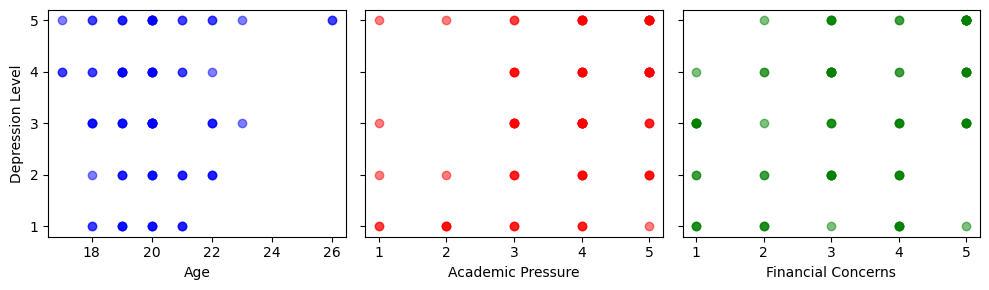

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), tight_layout=True)
axs[0].scatter(age, y, alpha=0.5, color='b')
axs[1].scatter(press, y, alpha=0.5, color='r')
axs[2].scatter(money, y, alpha=0.5, color='g')

xlabels = ['Age', 'Academic Pressure', 'Financial Concerns']
[ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]

axs[0].set_ylabel('Depression Level')
[ax.set_yticklabels([]) for ax in axs[1:]]
plt.show()

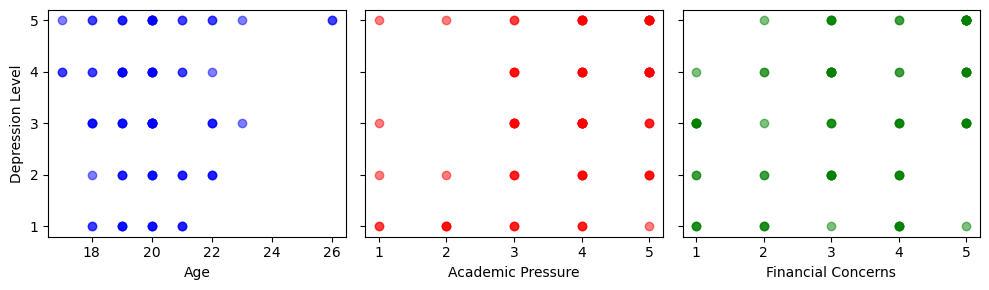

In [8]:
press1 = press 
fig, axs = plt.subplots(1, 3, figsize=(10, 3), tight_layout=True)
axs[0].scatter(age, y, alpha=0.5, color='b')
axs[1].scatter(press1, y, alpha=0.5, color='r')
axs[2].scatter(money, y, alpha=0.5, color='g')

xlabels = ['Age', 'Academic Pressure', 'Financial Concerns']
[ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]
axs[1].set_xticks([1, 2, 3, 4, 5]) 
axs[0].set_ylabel('Depression Level')
[ax.set_yticklabels([]) for ax in axs[1:]]
plt.show()

Next let's add regression lines and correlation coefficients to each plot to identify potential linear relationships:

In [9]:
def corrcoeff(x, y):
    if len(x) == 0 or len(y) == 0: return 0
    r = np.corrcoef(x, y)[0, 1]
    return r
def plot_regression_line(ax, x, y, **kwargs):
    if len(x) == 0 or len(y) == 0: return
    a, b = np.polyfit(x, y, deg=1)
    x0, x1 = min(x), max(x)
    y0, y1 = a*x0 + b, a*x1 + b
    ax.plot([x0, x1], [y0, y1], **kwargs)

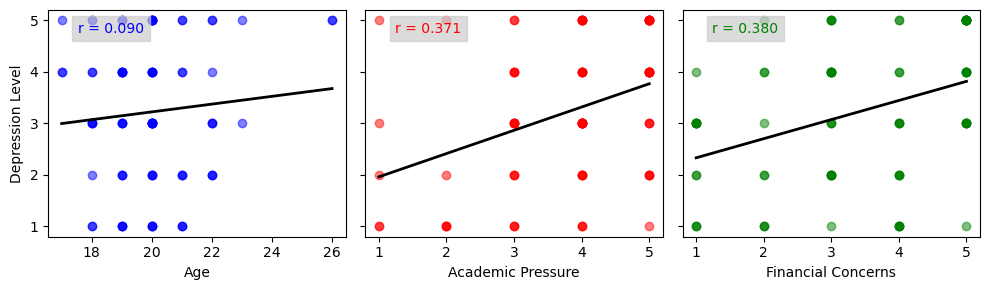

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), tight_layout=True)
ivs    = [age, press, money]
colors = ['b', 'r', 'g']

for ax, x, c in zip(axs, ivs, colors):
    ax.scatter(x, y, alpha=0.5, color=c)
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    r = corrcoeff(x, y)
    ax.text(0.1, 0.9, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

xlabels = ['Age', 'Academic Pressure', 'Financial Concerns']
[ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]

axs[1].set_xticks([1, 2, 3, 4, 5])
axs[0].set_ylabel('Depression Level')
[ax.set_yticklabels([]) for ax in axs[1:]]
plt.show()

The correlation coefficients show varying degrees of relationship. However, in the Financial Concerns data (right panel above), it is worth investigating if there are distinct trends for the Low Depression group (score <= 3) and the High Depression group (score > 3). Let's plot Depression vs. Financial Concerns separately for these two groups, along with linear regression trends.

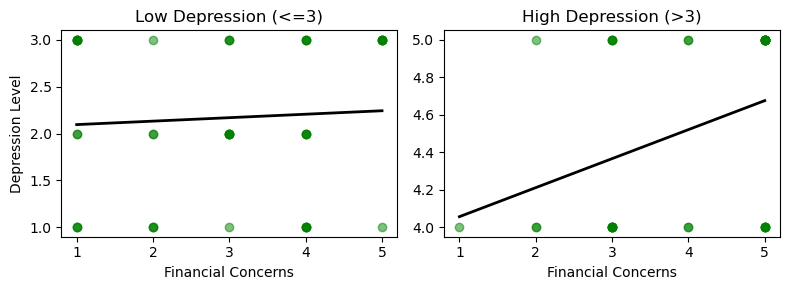

In [11]:
i_low  = y <= 3
i_high = y > 3

fig, axs = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)
i_list = [i_low, i_high]

for ax, idx in zip(axs, i_list):
    if len(money[idx]) > 0:
        ax.scatter(money[idx], y[idx], alpha=0.5, color='g')
        plot_regression_line(ax, money[idx], y[idx], color='k', ls='-', lw=2)

[ax.set_xlabel('Financial Concerns') for ax in axs]
axs[0].set_title('Low Depression (<=3)')
axs[0].set_ylabel('Depression Level')
axs[1].set_title('High Depression (>3)')
plt.show()

The linear trend lines in the figures above help visualize the relationship within each group:

- Depression levels may show specific trends associated with financial concerns in the low-depression group.
- A different pattern might emerge in the high-depression group.

Linear regression provides an average trend. To see the distribution more clearly, let's highlight the average Financial Concerns score for each Depression level.

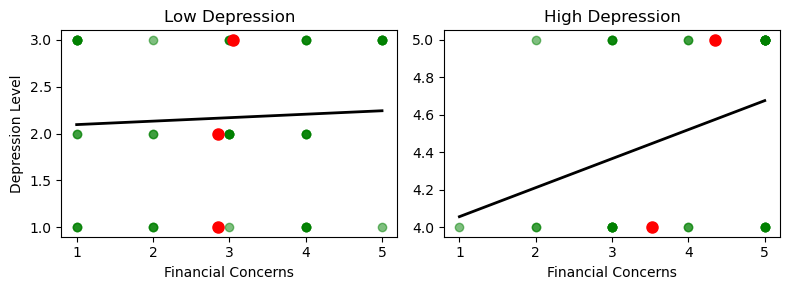

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)
q_groups = [[1, 2, 3], [4, 5]] 
for ax, idx, qs in zip(axs, [i_low, i_high], q_groups):
    if len(money[idx]) > 0:
        ax.scatter(money[idx], y[idx], alpha=0.5, color='g')
        plot_regression_line(ax, money[idx], y[idx], color='k', ls='-', lw=2)
        
        for q in qs:
            subset = money[idx][y[idx] == q]
            if len(subset) > 0:
                ax.plot(subset.mean(), q, 'ro', ms=8)

[ax.set_xlabel('Financial Concerns') for ax in axs]
axs[0].set_title('Low Depression')
axs[0].set_ylabel('Depression Level')
axs[1].set_title('High Depression')
plt.show()


These analyses provide deeper insights into how factors like Financial Concerns relate to Depression levels across different groups. Let's now assemble all these results into a single comprehensive figure for reporting purposes:

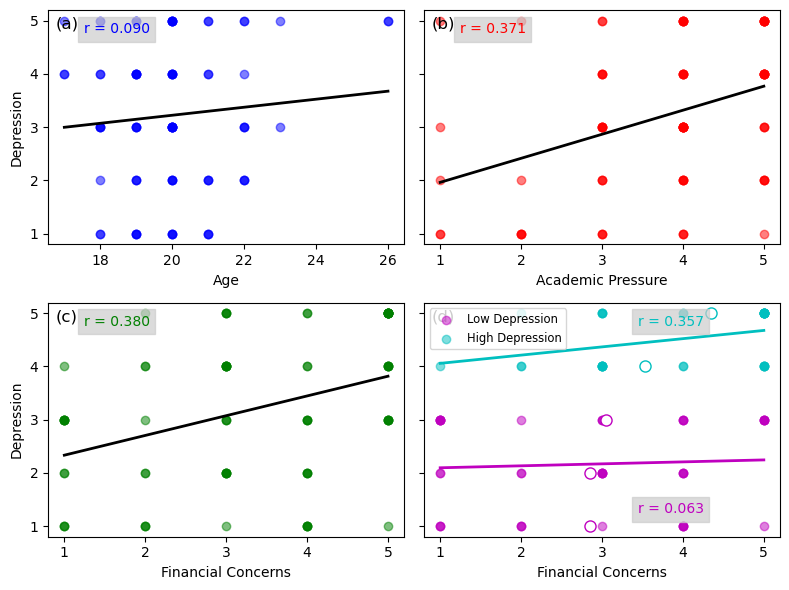

<p><span style="font-size: 1.2em;"><b>Figure 1</b>: Correlations amongst main variables.</span></p><br><br>

In [13]:
def plot_descriptive():
    
    fig, axs = plt.subplots(2, 2, figsize=(8, 6), tight_layout=True)
    ivs    = [age, press, money]
    colors = ['b', 'r', 'g']
    for ax, x, c in zip(axs.ravel()[:3], ivs, colors):
        ax.scatter(x, y, alpha=0.5, color=c)
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
        r = corrcoeff(x, y)
        ax.text(0.1, 0.9, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    xlabels = ['Age', 'Academic Pressure', 'Financial Concerns']
    [ax.set_xlabel(s) for ax, s in zip(axs.ravel()[:3], xlabels)]
    
    axs[0, 1].set_xticks([1, 2, 3, 4, 5])
    [ax.set_ylabel('Depression') for ax in axs[:, 0]]
    [ax.set_yticklabels([]) for ax in axs[:, 1]]
    ax       = axs[1, 1]
    i_low    = y <= 3
    i_high   = y > 3
    fcolors  = ['m', 'c']
    labels   = ['Low Depression', 'High Depression']
    q_groups = [[1, 2, 3], [4, 5]]
    ylocs    = [0.1, 0.9]

    for idx, c, s, qs, yloc in zip([i_low, i_high], fcolors, labels, q_groups, ylocs):
        if len(money[idx]) > 0:
            ax.scatter(money[idx], y[idx], alpha=0.5, color=c, facecolor=c, label=s)
            plot_regression_line(ax, money[idx], y[idx], color=c, ls='-', lw=2)
            for q in qs:
                subset = money[idx][y[idx] == q]
                if len(subset) > 0:
                    ax.plot(subset.mean(), q, 'o', color=c, mfc='w', ms=8)
            
            r = corrcoeff(money[idx], y[idx])
            ax.text(0.6, yloc, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    ax.legend(fontsize='small')
    ax.set_xlabel('Financial Concerns')
    panel_labels = ['a', 'b', 'c', 'd']
    [ax.text(0.02, 0.92, f'({s})', size=12, transform=ax.transAxes) for ax, s in zip(axs.ravel(), panel_labels)]
    
    plt.show()
    
    display_title('Correlations amongst main variables.', pref='Figure', num=1)
plot_descriptive()